# Predicting Car Prices
This project is my first time practicing a machine learning model's workflow, by predicting car prices.

## Introduction to the Dataset
The data was taken from UCI Machine Learning Repository and contains information about cars.
For further information: https://archive.ics.uci.edu/ml/datasets/automobile

In [17]:
import pandas as pd
import numpy as np

columns = cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=columns)
print(cars.head())
print(cars.info())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compressi

Let's select only the columns with numeric values.

In [18]:
numeric_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_values_cols]
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


## Data Cleaning
We will first replace all the '?' values in the normalized-losses column, change all columns to be a numeric type, and then normalize all the numeric columns so they range between 0 and 1.

In [19]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [20]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


Since price is the column we want to predict, we will remove the 4 rows with na values.

In [21]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Fill in the remaining na values with column's mean.

In [22]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Normalizing values so they range between 0 and 1, except for the target column (price):

In [23]:
price = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col, target_col, df):
    # Randomize the df before splitting
    np.random.seed(1)
    randomized_index = np.random.permutation(df.index)
    randomized_df = df.reindex(randomized_index)
    
    # Split the df into a training set and a test set
    cutoff = int(len(randomized_df)/2)
    train_df = randomized_df[0:cutoff]
    test_df = randomized_df[cutoff:]
    
    # Train the model
    knn = KNeighborsRegressor()
    knn.fit(train_df[[training_col]], train_df[target_col])
    predicted_price = knn.predict(test_df[[training_col]])
    
    # Calculate RMSE
    mse = mean_squared_error(test_df[target_col], predicted_price)
    rmse = np.sqrt(mse)
    return rmse

rmses = {}
features = numeric_cars.columns.drop('price')
for feature in features:
    rmses[feature] = knn_train_test(feature, 'price', numeric_cars)

# Change the dictionary to a series for ease of view
rmses_series = pd.Series(rmses)
rmses_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

We can see that engine-size is the most accurate feature. Horsepower is second behind, and very close together are curb-weight, highway-mpg, width and city-mpg.
Makes sense - these are the common attributes people check when looking for a car.
Now we will modify the knn_train_test() function to also check different k values.

In [25]:
def knn_train_test(training_col, target_col, df, k):
    # Randomize the df before splitting
    np.random.seed(1)
    randomized_index = np.random.permutation(df.index)
    randomized_df = df.reindex(randomized_index)
    
    # Split the df into a training set and a test set
    cutoff = int(len(randomized_df)/2)
    train_df = randomized_df[0:cutoff]
    test_df = randomized_df[cutoff:]
    
    # Train the model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[training_col]], train_df[target_col])
    predicted_price = knn.predict(test_df[[training_col]])
    
    # Calculate RMSE
    mse = mean_squared_error(test_df[target_col], predicted_price)
    rmse = np.sqrt(mse)
    return rmse

rmses = {}
features = numeric_cars.columns.drop('price')
for feature in features:
    feature_rmses = {}
    for k in [1, 3, 5, 7, 9]:
        feature_rmses[k] = knn_train_test(feature, 'price', numeric_cars, k)
    rmses[feature] = feature_rmses

print(rmses)

{'stroke': {1: 9116.495955406906, 3: 7338.68466990294, 9: 7735.554366079291, 5: 8006.529544647101, 7: 7803.937796804327}, 'wheel-base': {1: 4493.734068810494, 3: 5120.161506064513, 9: 5738.405685192312, 5: 5461.553997873057, 7: 5448.1070513823315}, 'bore': {1: 8602.58848450066, 3: 6984.239489480916, 9: 6866.808502038413, 5: 6780.627784685976, 7: 6878.097965921532}, 'normalized-losses': {1: 7846.750605148984, 3: 7500.5698123109905, 9: 7688.096096891432, 5: 7330.197653434445, 7: 7756.421586234123}, 'engine-size': {1: 3258.4861059962027, 3: 2840.562805643501, 9: 3831.8244149840766, 5: 3238.4628296477176, 7: 3563.086774256415}, 'width': {1: 4559.257297950061, 3: 4606.413692169901, 9: 4652.914172067787, 5: 4704.482589704386, 7: 4571.485046194653}, 'height': {1: 8904.04645636071, 3: 8277.609643045525, 9: 7811.03606291223, 5: 8144.441042663747, 7: 7679.598124393773}, 'compression-rate': {1: 8087.205346523092, 3: 7375.063685578359, 9: 7024.485525463435, 5: 6610.812153159129, 7: 6732.8012829415

## Multivariate Model

First we will sort the features by mean RMSE.

In [26]:
feature_avg_rmse = {}
for feature in rmses:
    feature_rmses_dict = rmses[feature]
    avg_rmse = np.mean(list(feature_rmses_dict.values()))
    feature_avg_rmse[feature] = avg_rmse
feature_avg_rmse = pd.Series(feature_avg_rmse)
sorted_feature_avg_rmse = feature_avg_rmse.sort_values()
print(sorted_feature_avg_rmse)
sorted_features = sorted_feature_avg_rmse.index

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [27]:
def knn_train_test(training_cols, target_col, df):
    # Randomize the df before splitting
    np.random.seed(1)
    randomized_index = np.random.permutation(df.index)
    randomized_df = df.reindex(randomized_index)
    
    # Split the df into a training set and a test set
    cutoff = int(len(randomized_df)/2)
    train_df = randomized_df[0:cutoff]
    test_df = randomized_df[cutoff:]
    
    # Train the model
    knn = KNeighborsRegressor()
    knn.fit(train_df[training_cols], train_df[target_col])
    predicted_price = knn.predict(test_df[training_cols])
    
    # Calculate RMSE
    mse = mean_squared_error(test_df[target_col], predicted_price)
    rmse = np.sqrt(mse)
    return rmse


rmses = {}
for num_features in range(2,6):
    rmses[num_features] = knn_train_test(sorted_features[0:num_features], 'price', numeric_cars)
print(rmses)

{2: 2949.8817277180374, 3: 3580.7376651928435, 4: 3487.340917327035, 5: 3410.2170133901805}


## Hyperparameter Tuning

For the models in the last step, we will vary the hyperparameter (number of neighbours) from 1 to 25.

In [28]:
def knn_train_test(training_cols, target_col, df, k):
    # Randomize the df before splitting
    np.random.seed(1)
    randomized_index = np.random.permutation(df.index)
    randomized_df = df.reindex(randomized_index)
    
    # Split the df into a training set and a test set
    cutoff = int(len(randomized_df)/2)
    train_df = randomized_df[0:cutoff]
    test_df = randomized_df[cutoff:]
    
    # Train the model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[training_cols], train_df[target_col])
    predicted_price = knn.predict(test_df[training_cols])
    
    # Calculate RMSE
    mse = mean_squared_error(test_df[target_col], predicted_price)
    rmse = np.sqrt(mse)
    return rmse

rmses = {}
for num_features in range(2,6):
    hp_rmses = {}
    for k in range(1, 26):
        hp_rmses[k] = knn_train_test(sorted_features[0:num_features], 'price', numeric_cars, k)
    rmses[num_features] = hp_rmses

print(rmses)



{2: {1: 2783.6204237227344, 2: 2657.7963807419765, 3: 2792.586573031673, 4: 2891.5329686923255, 5: 2949.8817277180374, 6: 3096.402601694776, 7: 3164.681969020496, 8: 3413.228359192009, 9: 3748.6716603306486, 10: 4080.7125057341937, 11: 4215.6372280600335, 12: 4275.421524277872, 13: 4373.901683035496, 14: 4424.285137239815, 15: 4539.505493095937, 16: 4667.307671446768, 17: 4729.605305844226, 18: 4790.556632159094, 19: 4824.3866193292615, 20: 4840.850914693829, 21: 4837.429062000271, 22: 4831.16988267597, 23: 4861.679492959275, 24: 4903.346008862579, 25: 4955.892429427362}, 3: {1: 3399.8148100410203, 2: 3497.191103423058, 3: 3333.6966577570593, 4: 3355.8842294742026, 5: 3580.7376651928435, 6: 3732.943016673517, 7: 3639.9439408462786, 8: 3747.4209132113137, 9: 3986.593913133887, 10: 4005.354888715163, 11: 4121.687230061635, 12: 4255.700651624227, 13: 4328.476829895253, 14: 4332.216494947217, 15: 4388.225713011904, 16: 4408.838883583756, 17: 4404.781029718083, 18: 4447.577705091259, 19: 45

Let's plot the results for easier view:

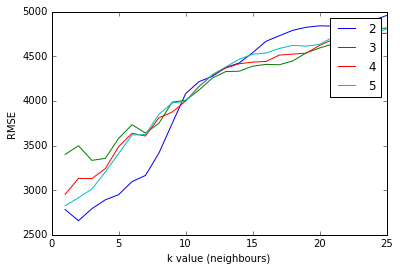

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

for neighbours, hp_rmses in rmses.items():
    x = list(hp_rmses.keys())
    y= list(hp_rmses.values())
    plt.plot(x, y, label=neighbours)

plt.xlabel('k value (neighbours)')
plt.ylabel('RMSE')
plt.legend()

We can see that the best model (AKA lowest RMSE) uses the 2 best features, with only 2 nearest neighbors. The two best features are engine size and horse power.